In [490]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [491]:
data = pd.read_csv('../input/graduate-admissions/Admission_Predict.csv',index_col = 'Serial No.')

In [492]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [493]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [495]:
import matplotlib.pyplot as plt
import seaborn as sns

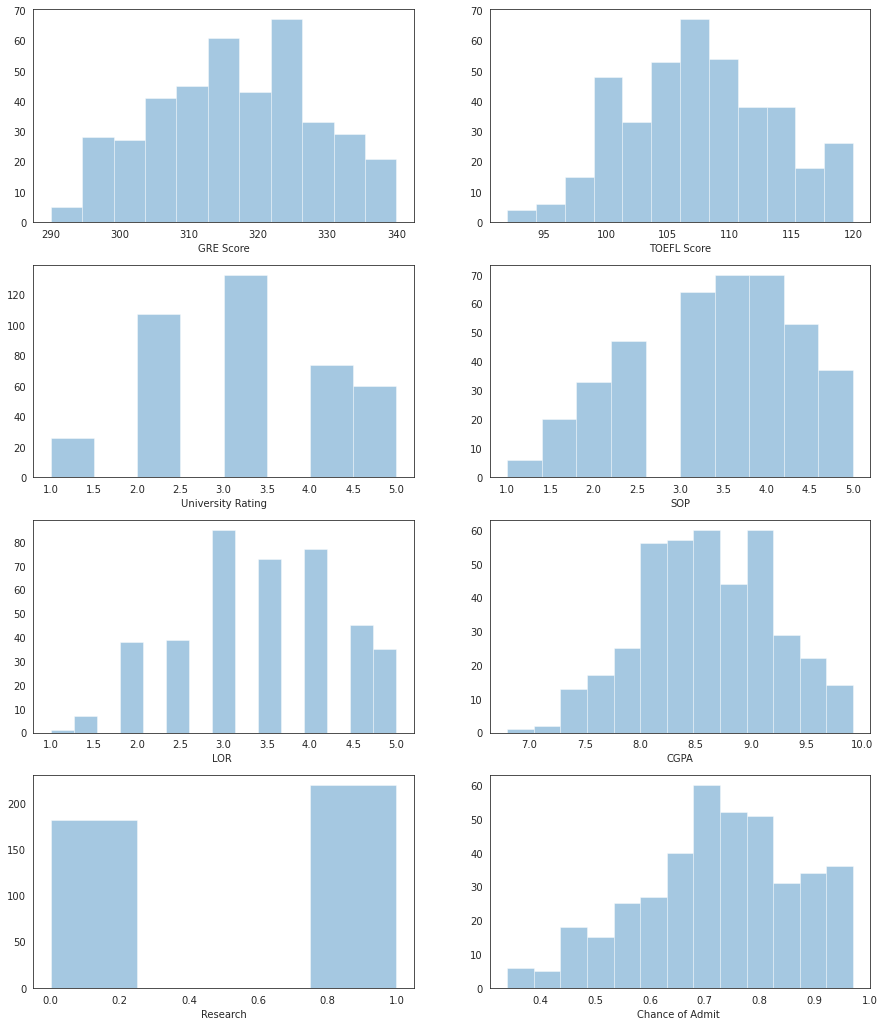

In [496]:
fig,ax = plt.subplots(4,2,figsize = (15,18))
features = list(data.columns)
x = 0
y = 0
sns.set_style('whitegrid')
for feature in features:
    sns.distplot(a = data[feature],kde = False,ax = ax[x,y])
    if y==1:
        x +=1
        y = 0
    else:y+=1

In [497]:
print(features)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [498]:
features = ['GRE Score', 'TOEFL Score', 'University Rating','CGPA']

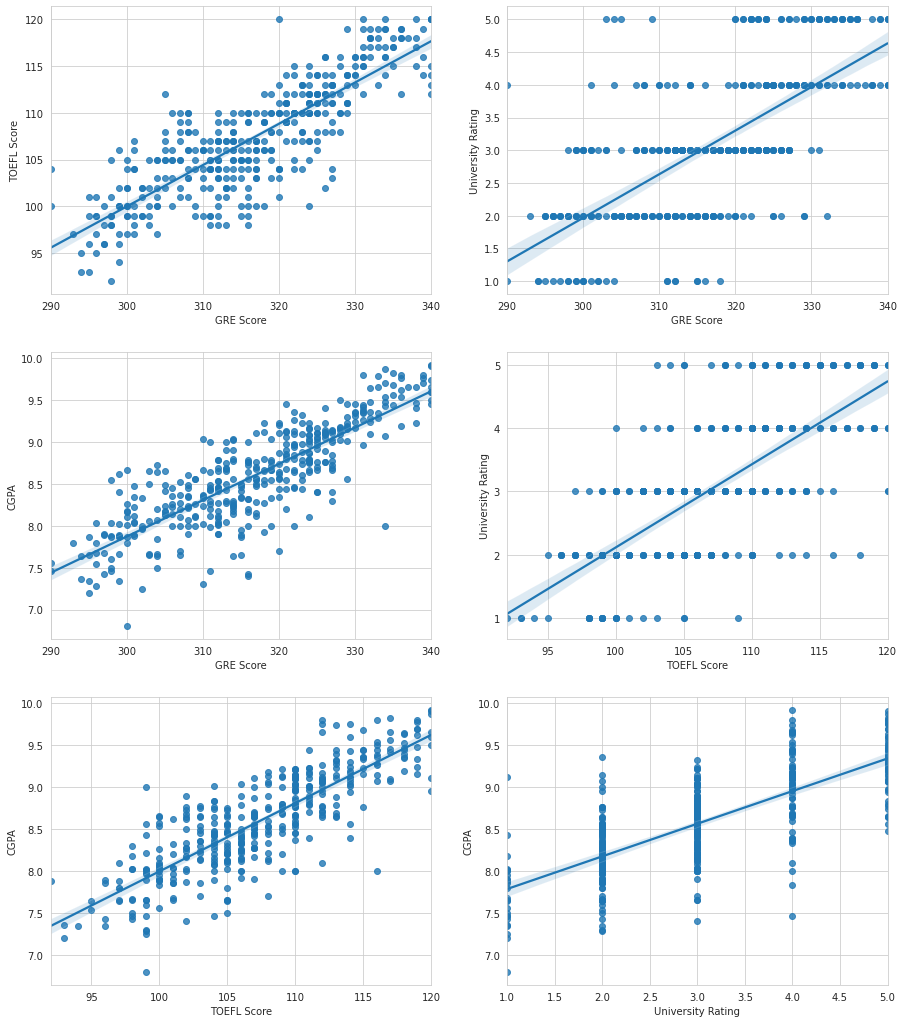

In [499]:
fig,ax = plt.subplots(3,2,figsize = (15,18))
x,y = 0,0
sns.set_style('darkgrid')
for i in range(len(features)-1):
    for j in range(i+1,len(features)):
        sns.regplot(x = data[features[i]],y = data[features[j]],ax =ax[x,y] )
        if y==1:
            x+=1
            y=0
        else:y+=1

In [500]:
admit_percent = [">=50%" if x>=0.5 else "<50%" for x in data['Chance of Admit ']]

In [501]:
admit_percent[:10]

['>=50%',
 '>=50%',
 '>=50%',
 '>=50%',
 '>=50%',
 '>=50%',
 '>=50%',
 '>=50%',
 '>=50%',
 '<50%']

In [502]:
data['Admission Percentage'] = admit_percent

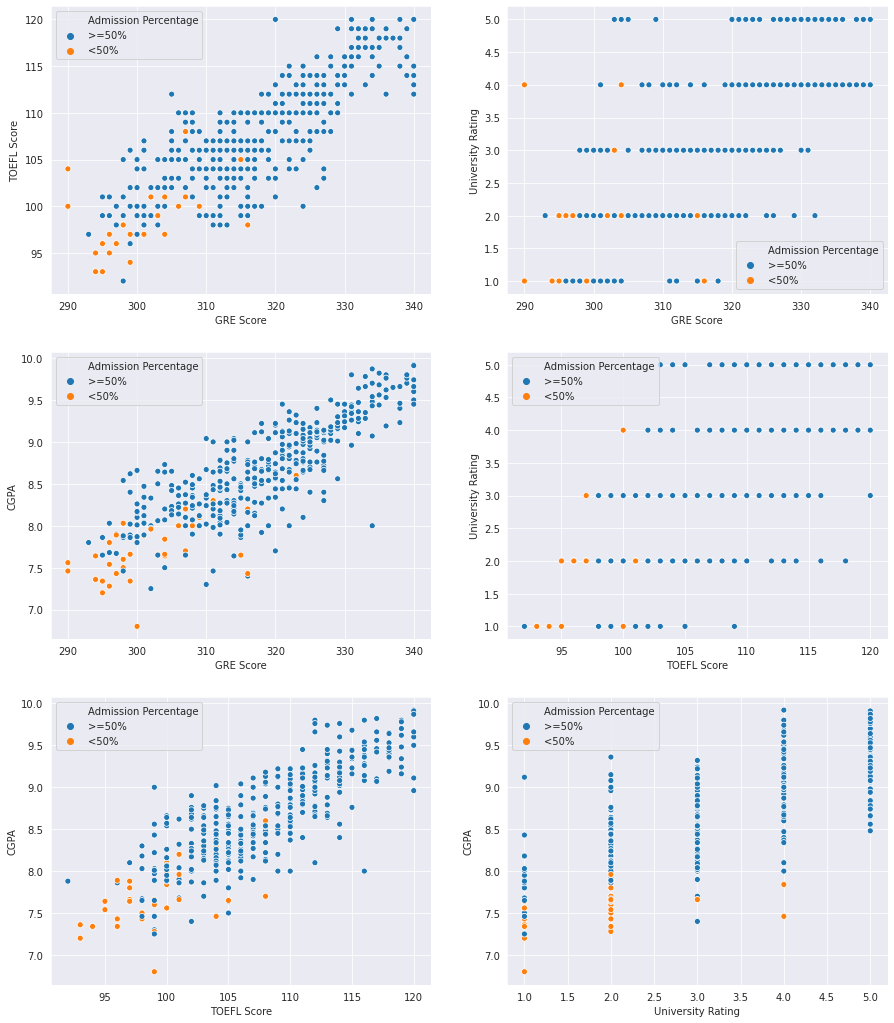

In [503]:
fig,ax = plt.subplots(3,2,figsize = (15,18))
x,y = 0,0
sns.set_style('darkgrid')
for i in range(len(features)-1):
    for j in range(i+1,len(features)):
        sns.scatterplot(x = data[features[i]],y = data[features[j]],hue = data['Admission Percentage'],ax = ax[x,y])
        if y==1:
            x+=1
            y=0
        else:y+=1

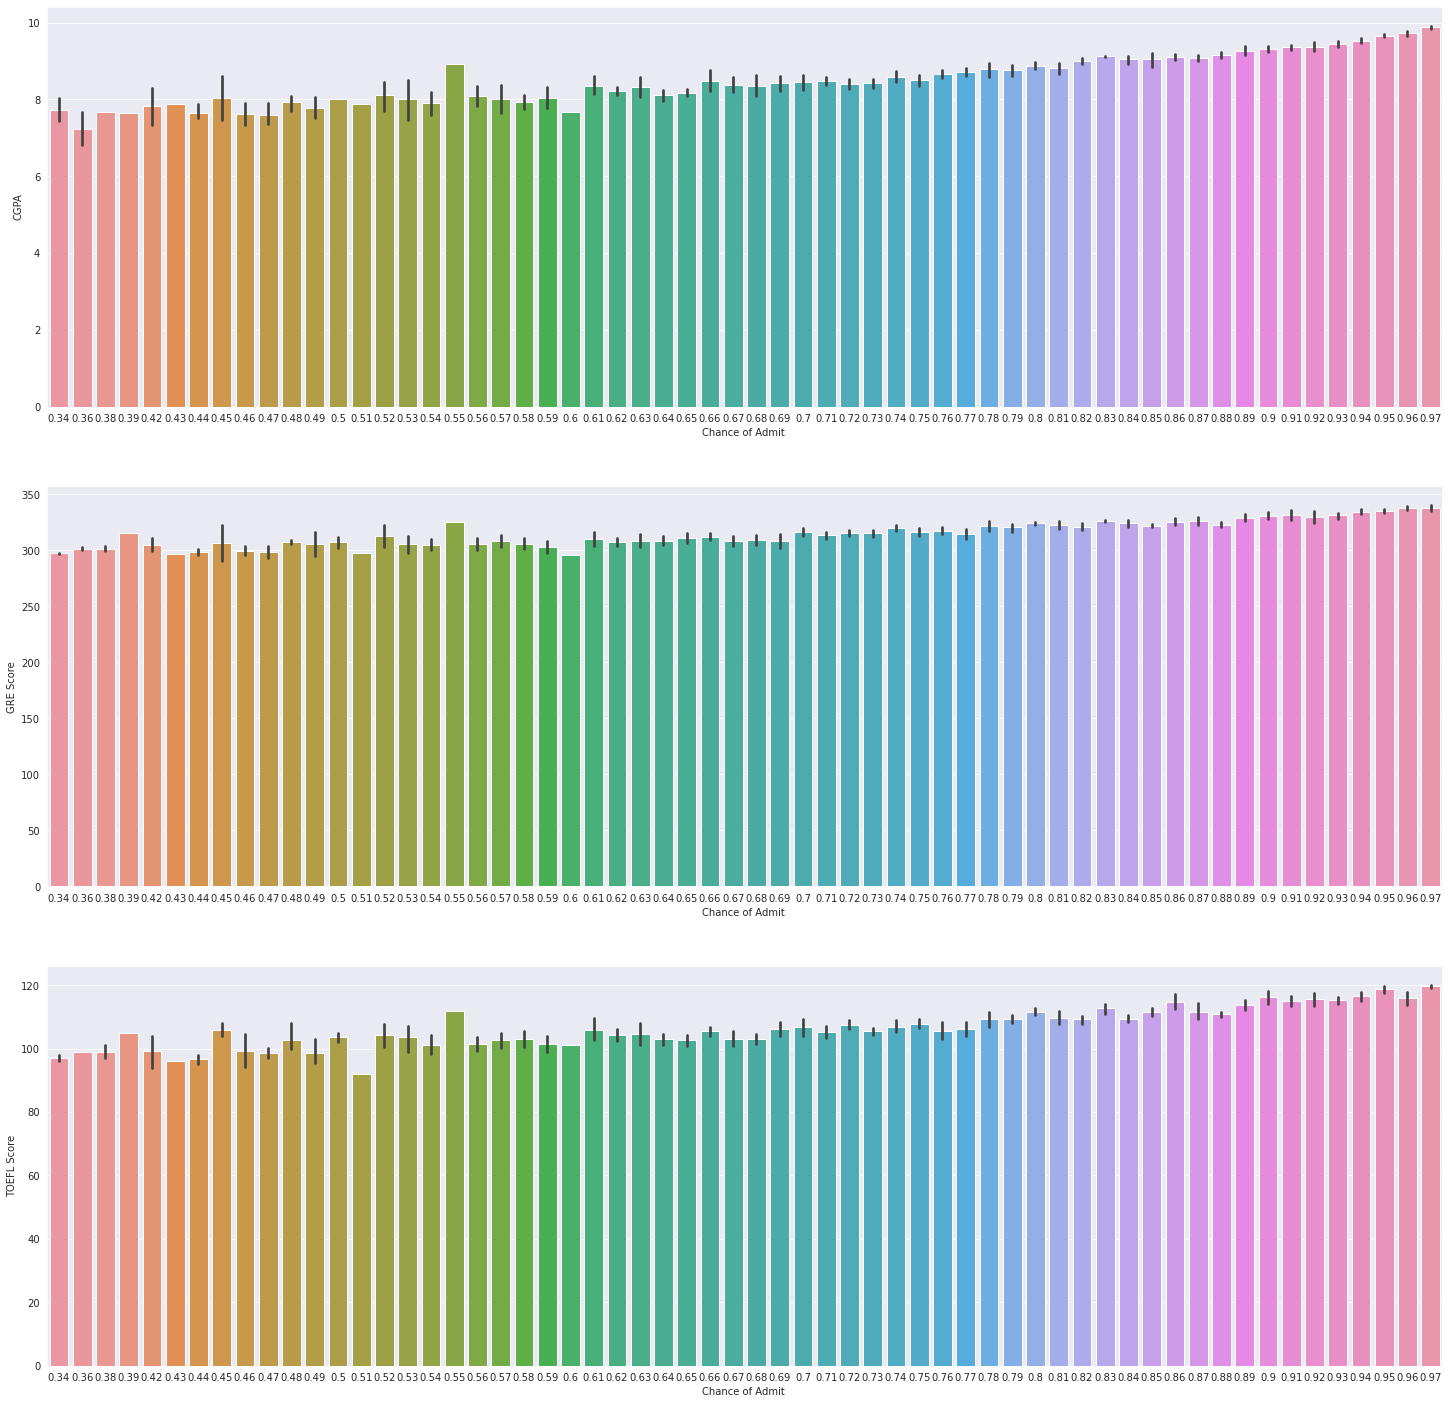

In [504]:
fig,ax = plt.subplots(3,1,figsize = (25,25))
#plt.figure(figsize = (25,10))
sns.barplot(x = data['Chance of Admit '],y = data['CGPA'],ax = ax[0] )
sns.barplot(x = data['Chance of Admit '],y = data['GRE Score'],ax = ax[1] )
sns.barplot(x = data['Chance of Admit '],y = data['TOEFL Score'],ax = ax[2] )

Text(0.5, 1.0, 'Number of people admitted and not admitted')

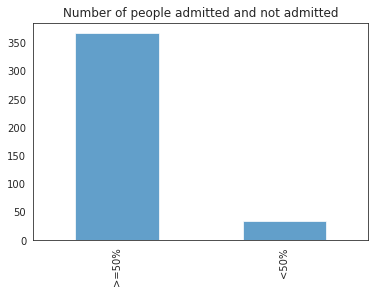

In [505]:
sns.set_style('white')
data['Admission Percentage'].value_counts().plot(kind = 'bar',alpha = 0.7)
plt.title("Number of people admitted and not admitted")

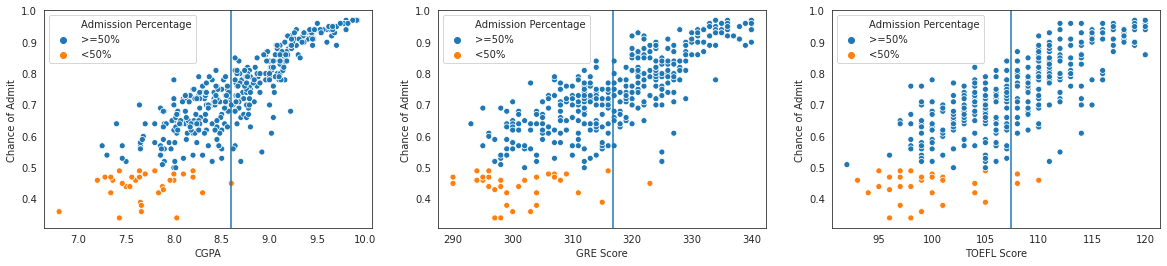

In [506]:
f,ax = plt.subplots(1,3,figsize = (20,4))
sns.scatterplot(y = data['Chance of Admit '],x = data['CGPA'],hue = data['Admission Percentage'],ax = ax[0])
ax[0].axvline(data['CGPA'].mean())
sns.scatterplot(y = data['Chance of Admit '],x = data['GRE Score'],hue = data['Admission Percentage'],ax = ax[1])
ax[1].axvline(data['GRE Score'].mean())
sns.scatterplot(y = data['Chance of Admit '],x = data['TOEFL Score'],hue = data['Admission Percentage'],ax = ax[2])
ax[2].axvline(data['TOEFL Score'].mean())

Text(0.5, 1.0, 'Correlation')

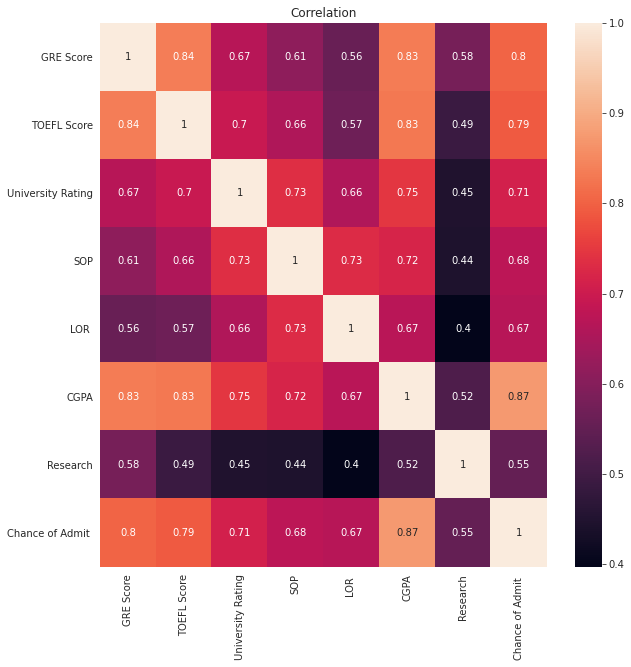

In [507]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True)
plt.title('Correlation')

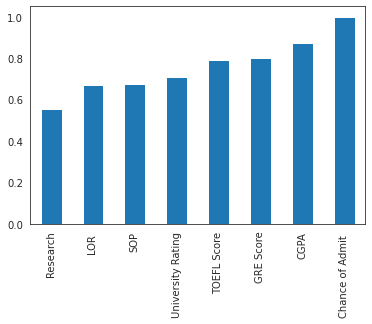

In [508]:
correlations = data.corr().sort_values(by = 'Chance of Admit ')
correlations['Chance of Admit '].plot(kind = 'bar')

In [509]:
from sklearn.model_selection import train_test_split

In [510]:
data.drop('Admission Percentage',axis = 1,inplace = True)
X = data.drop('Chance of Admit ',1)
Y = data['Chance of Admit ']

In [511]:
X, xtest, Y, ytest = train_test_split(X,Y,test_size = 0.1)

In [512]:
from sklearn.linear_model import LinearRegression

In [513]:
linear_model = LinearRegression()

In [514]:
linear_model.fit(X,Y)
linear_model.score(xtest,ytest)

0.7893275381702908

In [515]:
best_features = ['CGPA','TOEFL Score','GRE Score','University Rating']

In [527]:
X = data[best_features]
Y = data['Chance of Admit ']

In [528]:
X, xtest, Y, ytest = train_test_split(X,Y,test_size = 0.1)

In [531]:
best_model = ''
best_score = 0
for i in range(5):
    linear_model.fit(X,Y)
    score = linear_model.score(xtest,ytest)
    if score > best_score:best_score,best_model = score,linear_model
print(best_score)

0.8617643210659414


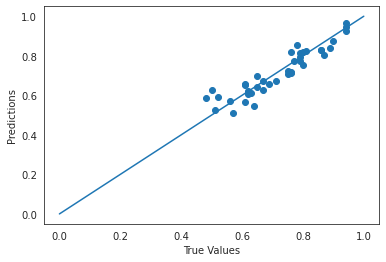

In [532]:
ypreds = linear_model.predict(xtest)
plt.scatter(ytest,ypreds)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0,1],[0,1])

# Neural Network

****

In [520]:
best_features = ['CGPA','TOEFL Score','GRE Score','University Rating']

In [543]:
X = data[best_features]
Y = data['Chance of Admit ']
X, xtest, Y, ytest = train_test_split(X,Y,test_size = 0.2)

In [544]:
import tensorflow as tf
from tensorflow import keras

In [545]:
neural_model = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(12,activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation = 'sigmoid')
])

In [546]:
neural_model.compile(loss='mse',optimizer = 'sgd')

In [547]:
history = neural_model.fit(X,Y,epochs = 15,batch_size = 10)

Epoch 1/15
32/32 [==============================] - 0s 1ms/step - loss: 0.1017
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0802
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0741
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0696
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0608
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0534
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0486
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0420
Epoch 10/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 11/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 12/15
32/32 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 13/15
32/32 [==============================

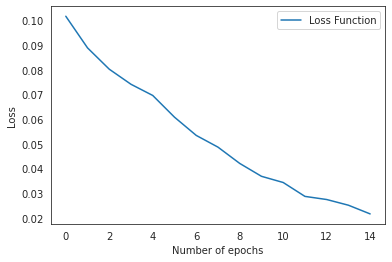

In [548]:
loss = history.history['loss']
plt.plot(loss,label = 'Loss Function')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()